# **Homomorphic Filtering**

PSNR between original and filtered image: 28.88 dB


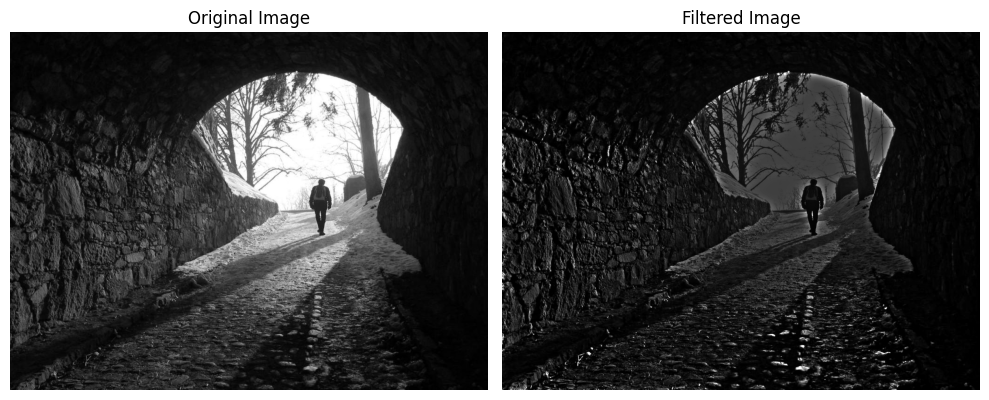

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_filter(I_shape, cutoff_frequency, c=2.0):
    P, Q = I_shape[0] / 2, I_shape[1] / 2
    U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]), sparse=False, indexing='ij')
    Duv = (((U - P) ** 2 + (V - Q) ** 2)).astype(float)
    H = np.exp((-c * Duv) / (2 * (cutoff_frequency ** 2)))
    return 1 - H


def apply_filter(I_fft, H, a=0.5, b=1.5):
    H = np.fft.fftshift(H)
    return (a + b * H) * I_fft

def homomorphic_filter(I, cutoff_frequency, a=0.5, b=1.5):
    if len(I.shape) != 2:
        raise ValueError("Input image must be a single-channel (grayscale) image.")

    I_log = np.log1p(np.array(I, dtype="float"))
    I_fft = np.fft.fft2(I_log)
    H = gaussian_filter(I_shape=I_fft.shape, cutoff_frequency=cutoff_frequency)
    I_fft_filtered = apply_filter(I_fft, H, a, b)
    I_filtered = np.fft.ifft2(I_fft_filtered)
    I_result = np.exp(np.real(I_filtered)) - 1

    return np.uint8(np.clip(I_result, 0, 255))

def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return 100  # No noise, images are identical
    PIXEL_MAX = 255.0
    psnr = 10 * np.log10((PIXEL_MAX ** 2) / mse)
    return psnr

if __name__ == "__main__":
    img_path = 'image_path'
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    filtered_img = homomorphic_filter(img, cutoff_frequency=20, a=0.75, b=1.25)

    psnr_value = calculate_psnr(img, filtered_img)
    print(f"PSNR between original and filtered image: {psnr_value:.2f} dB")

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title('Filtered Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
